# Analysis of CMIP6, ERA5, and CloudSat


# Table of Contents
<ul>
<li><a href="#introduction">1. Introduction</a></li>
<li><a href="#data_wrangling">2. Data Wrangling</a></li>
<li><a href="#exploratory">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusion">4. Conclusion</a></li>
<li><a href="#references">5. References</a></li>
</ul>

# 1. Introduction <a id='introduction'></a>


**Questions**
* How is the cloud phase and snowfall 


> **_NOTE:_** .

# 2. Data Wrangling <a id='data_wrangling'></a>


## Organize my data

- Define a prefix for my project (you may need to adjust it for your own usage on your infrastructure).
    - input folder where all the data used as input to my Jupyter Notebook is stored (and eventually shared)
    - output folder where all the results to keep are stored
    - tool folder where all the tools

The ERA5 0.25deg data is located in the folder `\scratch\franzihe\`, CloudSat at ...



In [1]:
lwp_threshold = 5

In [2]:
import os
import pathlib
import sys
import socket
hostname = socket.gethostname()

abs_path = str(pathlib.Path(hostname).parent.absolute())
WORKDIR = abs_path[:- (len(abs_path.split('/')[-2] + abs_path.split('/')[-1])+1)]


if "mimi" in hostname:
    print(hostname)
    DATA_DIR = "/mn/vann/franzihe/"
    # FIG_DIR = "/uio/kant/geo-geofag-u1/franzihe/Documents/Figures/ERA5/"
    FIG_DIR = f"/uio/kant/geo-geofag-u1/franzihe/Documents/Python/globalsnow/CloudSat_ERA5_CMIP6_analysis/Figures/CS_ERA5_CMIP6_hourly_{lwp_threshold}/"
elif "glefsekaldt" in hostname: 
    DATA_DIR = "/home/franzihe/Data/"
    FIG_DIR = "/home/franzihe/Documents/Figures/ERA5/"

INPUT_DATA_DIR = os.path.join(DATA_DIR, 'input')
OUTPUT_DATA_DIR = os.path.join(DATA_DIR, 'output')
UTILS_DIR = os.path.join(WORKDIR, 'utils')
FIG_DIR_mci = os.path.join(FIG_DIR, 'McIlhattan/')

sys.path.append(UTILS_DIR)
# make figure directory
try:
    os.mkdir(FIG_DIR)
except OSError:
    pass

try:
    os.mkdir(FIG_DIR_mci)
except OSError:
    pass

mimi.uio.no


## Import python packages
- `Python` environment requirements: file [requirements_globalsnow.txt](../../requirements_globalsnow.txt) 
- load `python` packages from [imports.py](../../utils/imports.py)
- load `functions` from [functions.py](../../utils/functions.py)


In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
from imports import(xr, ccrs, cy, plt, glob, cm, fct, np, pd, add_cyclic_point)
# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch
# from sklearn.metrics import r2_score
from seaborn import set_context
# plot cosmetics
set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2})

xr.set_options(display_style='html')

In [4]:
# reload imports
%load_ext autoreload
%autoreload 2

## Open variables
Get the data requried for the analysis. 



In [5]:
dat_in = os.path.join(OUTPUT_DATA_DIR, 'CS_ERA5_CMIP6')
dat_in
# make output data directory
# try:
#     os.mkdir(dat_out)
# except OSError:
#     pass

'/mn/vann/franzihe/output/CS_ERA5_CMIP6'

In [6]:
# variable_id = ['tas', 'prsn', 'pr', 'lwp', 'clivi', 'areacella']

In [7]:
ratios = xr.open_mfdataset(glob(f'{dat_in}/ratios_500/*LWP{lwp_threshold}_*.nc'))
ratios_hourly = xr.open_mfdataset(glob(f'{dat_in}_hourly/ratios_500/*LWP{lwp_threshold}_*.nc'))

In [8]:
# for model in list_models:
    
#     for var in variables:
#         if model == 'cloudsat_250' or model == 'cloudsat_500' or var == 'orig' or var == '2t':
#             file_pattern = f'{dat_in}/{var}/{model}_{var}*.nc'
#         else:
#             file_pattern = f'{dat_in}/{lwp_threshold}_{var}/{model}_{lwp_threshold}_{var}*.nc'
#         # print(file_pattern)
#         files = sorted(glob(file_pattern))
#         # print(files)
#         for file in files:
#             _ds = xr.open_mfdataset(file)
#             # [var][model]
#             ds[var][model] = xr.Dataset()
#             # ds_mci[var][model] = xr.Dataset()
#             # make the data cyclic going from -180 to 180
#             for var_id in _ds.keys():
#                 data = _ds[var_id]
                
#                 if 'lon' in _ds[var_id].dims and (data['lon'][0] != data['lon'][-1]*(-1)):
#                     lon = _ds.coords['lon']
#                     lon_idx = data.dims.index('lon')
#                     wrap_data, wrap_lon = add_cyclic_point(data, coord=lon, axis=lon_idx)
                    
#                     if len(wrap_data.shape) == 2:
#                         ds[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(lat=data['lat'],
#                                                                                             lon=np.append(data['lon'].values, data['lon'][0].values*(-1))))
                    
#                     if len(wrap_data.shape) == 3:
#                         if 'time' in data.dims:
#                             ds[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(time=data['time'],
#                                                                                                 lat=data['lat'],
#                                                                                                 lon=np.append(data['lon'].values, data['lon'][0].values*(-1))))
#                         elif 'model' in data.dims:
#                             ds[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(lat=data['lat'],
#                                                                                                 lon=np.append(data['lon'].values, data['lon'][0].values*(-1)),
#                                                                                                 model=data['model']), 
#                                                                   )
#                     if len(wrap_data.shape) == 4:
#                         ds[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(time=data['time'],
#                                                                                             lat=data['lat'],
#                                                                                             lon=np.append(data['lon'].values, data['lon'][0].values*(-1)),
#                                                                                             model=data['model']))
                        
#                 else:
#                     ds[var][model][var_id] = data
                    
#                 ds[var][model][var_id].attrs = data.attrs
                
#             # ds_mci[var][model] = xr.concat([ds[var][model].sel(lat=slice(-90,-66.91)),
#             #                                 ds[var][model].sel(lat=slice(66.91,90))], dim ='lat')
#             # ds_mci[var][model] = ds[var][model].where(np.logical_and((ds[var][model].lat<=66.91),(ds[var][model].lat>=66.91)), other=np.nan )
            
# # Access the datasets using  ds[var][model]
# # For example:
# # lcc_2t_days_dataset = ds['lcc_2t_days']['era_30']




In [9]:
# for model in list_models:
# # for model in list_models[1:2]:

    
#     for var in variables:
#         if model == 'cloudsat_250' or model == 'cloudsat_500':
#             file_pattern = f'{dat_in}/{var}/{model}_{var}*.nc'
#         elif model == 'era_30' or model == 'era_250' or model == 'era_500':
#             if var == 'orig' or var == '2t':
#                 file_pattern = f'{dat_in}_hourly/{var}/{model}_{var}*.nc'
#             else:
#                 file_pattern = f'{dat_in}_hourly/{lwp_threshold}_{var}/{model}_{lwp_threshold}_{var}*.nc'
#         else:
#             if var == 'orig' or var == '2t':
#                 file_pattern = f'{dat_in}/{var}/{model}_{var}*.nc'
#             else:
#                 file_pattern = f'{dat_in}/{lwp_threshold}_{var}/{model}_{lwp_threshold}_{var}*.nc'
                
                
#         files = sorted(glob(file_pattern))
#         # print(files)
#         for file in files:
#             _ds_hourly = xr.open_mfdataset(file)
#             # [var][model]
#             ds_hourly[var][model] = xr.Dataset()
#             # ds_hourly_mci[var][model] = xr.Dataset()
#             # make the data cyclic going from -180 to 180
#             for var_id in _ds_hourly.keys():
#                 data = _ds_hourly[var_id]
                
#                 if 'lon' in _ds_hourly[var_id].dims and (data['lon'][0] != data['lon'][-1]*(-1)):
#                     lon = _ds_hourly.coords['lon']
#                     lon_idx = data.dims.index('lon')
#                     wrap_data, wrap_lon = add_cyclic_point(data, coord=lon, axis=lon_idx)
                    
#                     if len(wrap_data.shape) == 2:
#                         ds_hourly[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(lat=data['lat'],
#                                                                                             lon=np.append(data['lon'].values, data['lon'][0].values*(-1))))
                    
#                     if len(wrap_data.shape) == 3:
#                         if 'time' in data.dims:
#                             ds_hourly[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(time=data['time'],
#                                                                                                 lat=data['lat'],
#                                                                                                 lon=np.append(data['lon'].values, data['lon'][0].values*(-1))))
#                         elif 'model' in data.dims:
#                             ds_hourly[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(lat=data['lat'],
#                                                                                                 lon=np.append(data['lon'].values, data['lon'][0].values*(-1)),
#                                                                                                 model=data['model']), 
#                                                                   )
#                     if len(wrap_data.shape) == 4:
#                         ds_hourly[var][model][var_id] = xr.DataArray(data = wrap_data, coords=dict(time=data['time'],
#                                                                                             lat=data['lat'],
#                                                                                             lon=np.append(data['lon'].values, data['lon'][0].values*(-1)),
#                                                                                             model=data['model']))
                        
#                 else:
#                     ds_hourly[var][model][var_id] = data
                    
#                 ds_hourly[var][model][var_id].attrs = data.attrs
                
#             # ds_hourly_mci[var][model] = xr.concat([ds_hourly[var][model].sel(lat=slice(-90,-66.91)),
#             #                                 ds_hourly[var][model].sel(lat=slice(66.91,90))], dim ='lat')
#             # ds_hourly_mci[var][model] = ds_hourly[var][model].where(np.logical_and((ds_hourly[var][model].lat<=66.91),(ds_hourly[var][model].lat>=66.91)), other=np.nan )
            
# # Access the datasets using  ds_hourly[var][model]
# # For example:
# # lcc_2t_days_dataset = ds_hourly['lcc_2t_days']['era_30']




In [10]:
# for var in ds.keys():
#     for model in ['cloudsat_250', 'cloudsat_500', 'cmip_250', 'cmip_500']:
#         # ds_hourly[var][model] = xr.Dataset()
#         try: 
#             ds_hourly[var][model] = ds[var][model]
#         except KeyError:
#             # print(var, model)
#             continue

In [11]:

dict_label = {
     # 'lcc_wo_snow': {'cb_label':'FsLCC (%)', 'levels':np.arange(0,110,10), 'vmin': 0, 'vmax':100, 'diff_levels':np.arange(-30,35,5), 'diff_vmin':-30, 'diff_vmax':30},
#      'lcc_w_snow':  {'cb_label':'FoS in sLCCs (%)', 'levels':np.arange(0,110,10), 'vmin': 0, 'vmax':100, 'diff_levels':np.arange(-60,65,5), 'diff_vmin':-60, 'diff_vmax':60},
#      'sf_eff':      {'cb_label':'SE in sLCCs (h$^{-1}$)', 'levels':np.arange(0,5.5,.5), 'vmin':0, 'vmax':5, 'diff_levels':np.arange(-1.2,1.4,.2), 'diff_vmin':-1.2, 'diff_vmax':1.2}#'Relative snowfall efficiency (h$^{-1}$)'
     
     'FLCC' : {'cb_label':'f$_{{LCC}}$ (%)',             'levels':np.arange(0,110.,10.), 'vmin':0, 'vmax': 100., 'vmax2': 100.,  'diff_levels':np.arange(-100,110,10),   'diff_vmin':-100, 'diff_vmax':100, 'bounds':np.linspace(0,40,9), 'qrates': list(np.arange(2.5,40,5))},
     'FsLCC': {'cb_label':'f$_{{sLCC}}$ (%)',            'levels':np.arange(0,110.,10.), 'vmin':0, 'vmax': 100, 'vmax2': 65.,   'diff_levels':np.arange(-100,110,10),   'diff_vmin':-100, 'diff_vmax':100, 'bounds':np.linspace(0,25,6), 'qrates': list(np.arange(2.5,25,5))}, 
     # 'FoP'  : {'cb_label':'FoP in LCCs (%)',      'levels':np.arange(0,105.,5.), 'vmin':0, 'vmax': 100,   'diff_levels':np.arange(-100,110,10),   'diff_vmin':-100, 'diff_vmax':100},
     # 'FoS'  : {'cb_label':'f$_{{snow}}$ (%)',     'levels':np.arange(0,110.,10.), 'vmin':0, 'vmax': 100, 'vmax2': 100.,   'diff_levels':np.arange(-100,110,10),   'diff_vmin':-100, 'diff_vmax':100, 'bounds':np.linspace(0,80,17), 'qrates':list(np.arange(2.5,80,5))},
     # 'pr_eff': {'cb_label':'PE in sLCCs (h$^{-1}$)', 'levels':np.arange(0,550.,50.), 'vmin':0, 'vmax':500,   'diff_levels':np.arange(-120,140,20),   'diff_vmin':-120, 'diff_vmax':120},
     'FLCC-FsLCC': {'cb_label':'f$_{{LCC}}$ (%), f$_{{sLCC}}$ (%)',  'levels':np.arange(0,110.,10.), 'vmin':0, 'vmax': 100, 'vmax2': 65.,   'diff_levels':np.arange(-100,110,10),   'diff_vmin':-100, 'diff_vmax':100, 'bounds':np.linspace(0,45,10), 'qrates': list(np.arange(2.5,45,5))},
     # 'sf_eff': {'cb_label':'SE in sLCCs (h$^{-1}$)','levels':np.arange(0,5.5,.5), 'vmin':0, 'vmax': 5, 'vmax2': 7.5,   'diff_levels':np.arange(-1.2,1.4,.2),   'diff_vmin':-1.2, 'diff_vmax':1.2, 'bounds':np.linspace(0,2,11), 'qrates': list(np.arange(0.1,2,0.2))},
     # 'sf_eff': {'cb_label':'SE in sLCCs (h$^{-1}$)','levels':np.arange(0,9.5,.5), 'vmin':0, 'vmax': 9,   'diff_levels':np.arange(-1.2,1.4,.2),   'diff_vmin':-1.2, 'diff_vmax':1.2},
     }


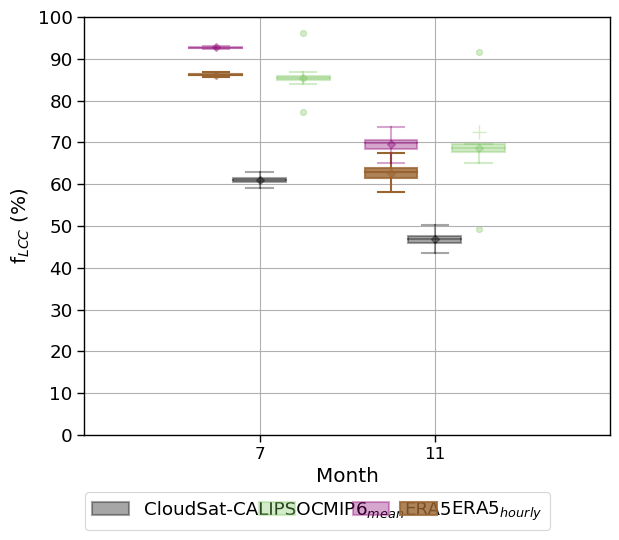

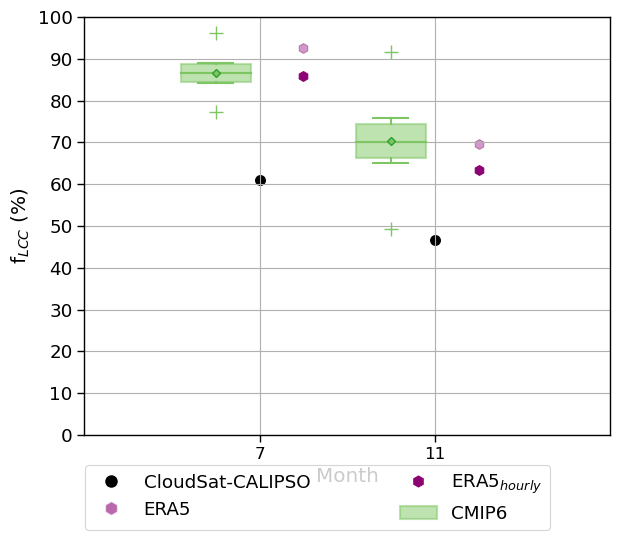

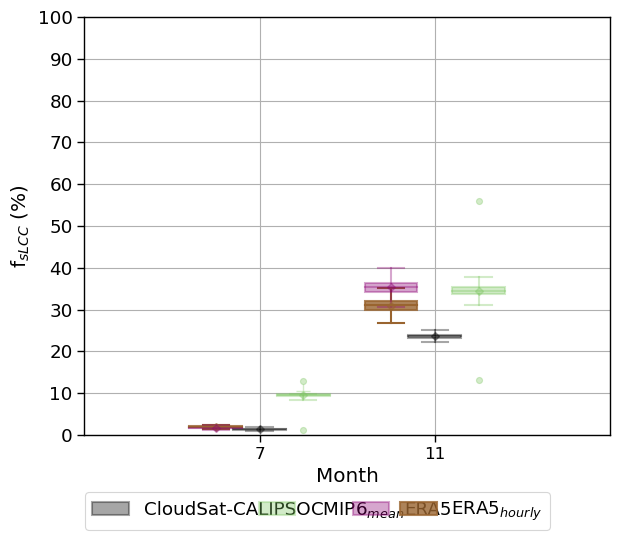

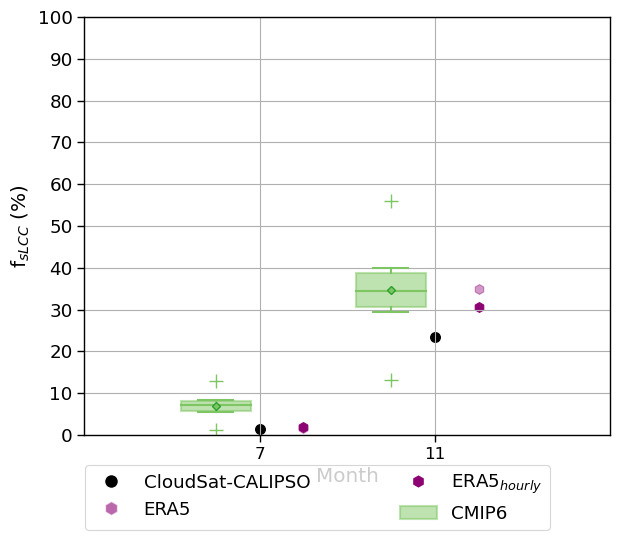

In [12]:
for var_name in ['FLCC', 'FsLCC']:
    fct.plt_monthly_interannual_variation_hourly_data(ratios, ratios_hourly, var_name, lwp_threshold, FIG_DIR, dict_label[var_name])
    fct.plt_monthly_model_variation_hourly(ratios, ratios_hourly, var_name, dict_label[var_name], FIG_DIR, lwp_threshold)


In [13]:
lat_extent = 45

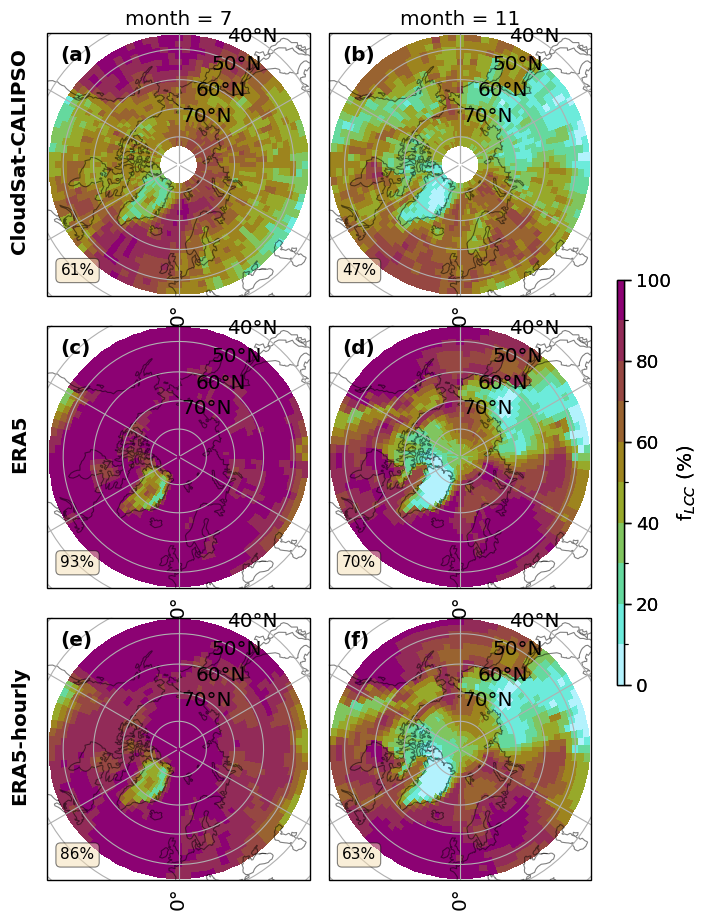

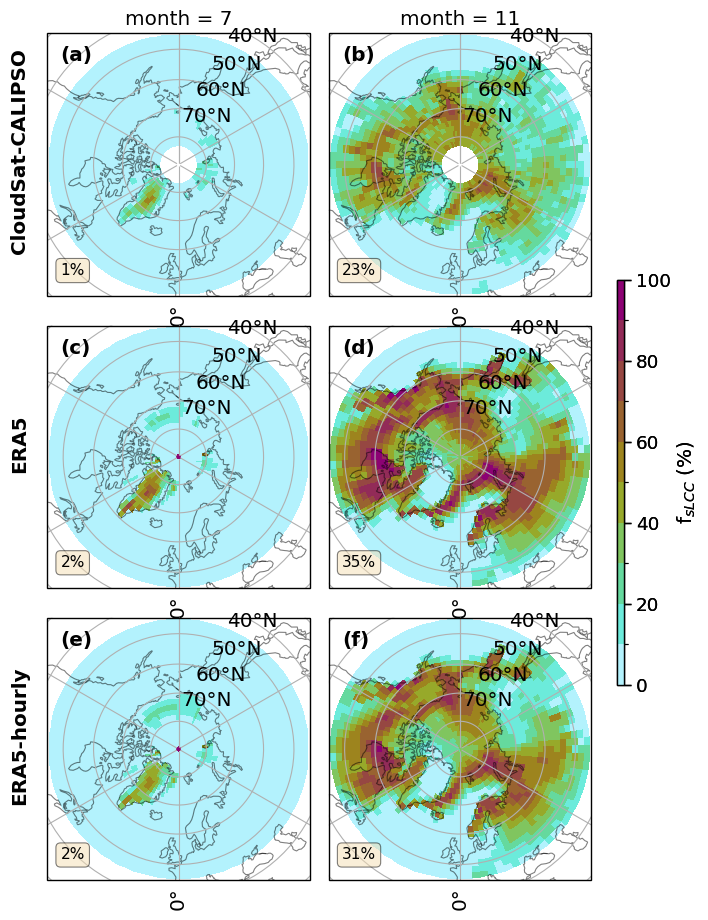

In [14]:
for var_name in ['FLCC', 'FsLCC']:
    val1= ratios[var_name + '_month'].sel(model='CloudSat')
    val1_mean= ratios[var_name + '_month_mean'].sel(model='CloudSat')

    val2= ratios[var_name + '_month'].sel(model='ERA5')
    val2_mean= ratios[var_name + '' + '_month_cs_mean'].sel(model='ERA5')

    val3= ratios_hourly[var_name + '_month'].sel(model='ERA5')
    val3_mean = ratios_hourly[var_name + '' +'_month_cs_mean'].sel(model='ERA5')
    
    hemisphere = 'NH'


    projection = fct.create_projection(hemisphere)
    density = 4
    f, axsm = plt.subplots(nrows=3, 
                                ncols=2, 
                                subplot_kw={'projection': projection}, 
                                figsize=[6, 9], sharex=True, sharey=True)
#     f.suptitle(f'LWP threshold: {lwp_threshold} g m$^{-2}$', y=1.005)

    model_labels = ['CloudSat-CALIPSO', 'ERA5', 'ERA5-hourly']

    for ax, row in zip(axsm[:,0], model_labels):
            ax.text(-0.07, 0.55, row, 
                    va='bottom', 
                    ha='center', 
                    rotation='vertical', 
                    rotation_mode='anchor', 
                    transform=ax.transAxes, 
                    fontweight='bold')
    for ax, k in zip(axsm.flatten(), range(len(fct.fig_label))):
            fct.setup_axes(ax, hemisphere, lat_extent)
            ax.text(0.05, 0.95, 
                    f'{fct.fig_label[k]}', 
                    fontweight='bold', 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes)
            
    list1 = [val1, val2, val3]
    list_glob = [val1_mean, val2_mean, val3_mean]

    for i, (value,hemi_glob) in enumerate(zip(list1,list_glob)):
            if i == 0:
                cmap = cm.hawaii_r 
                levels = dict_label[var_name]['levels']
                
            norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
            sub_title = ""
            
            for ax, month in zip(axsm.flatten()[i * 2: (i + 1) * 2 + 1], [7, 11]):
                    if i == 0:
                            sub_title = f'month = {val1.month.sel(month=month).values}'
                    
                    val = value.sel(lat=slice(45,90)) if hemisphere == 'NH' else value.sel(lat=slice(-90,-45))
                    cf = ax.pcolormesh(val.lon, val.lat, (val.where(~np.isnan(val))).sel(month=month), 
                                    transform=ccrs.PlateCarree(), 
                                    cmap=cmap, 
                                    norm=norm)
                    
                    fct.add_text_box(ax, hemi_glob.sel(hemisphere=hemisphere, month=month), var_name)
                    ax.set_title(sub_title)
                    
                    
                    if i == 1:
                            cbaxes = f.add_axes([1.02, 0.25, 0.0125, 0.45])
                            cb_label = dict_label[var_name]['cb_label']
                            plt.colorbar(cf, cax=cbaxes, shrink=0.5,extend=None, orientation='vertical', label=cb_label)
                    
            
                    #     if i == 2 and var_name != 'FLCC-FsLCC':
                    #         fct.plot_difference_significance(ax, hemisphere, diff_2, season, CI, density)
                    #         bb = [0.95, 0.09, 0.0125, 0.05]
                    #         axsm.flatten()[i].legend(
                    #             [Patch(facecolor='none', edgecolor='k', hatch=density * '/', label='CI < 95%')],
                    #             ['CI < 95%'], bbox_to_anchor=bb, loc=8, ncol=1, borderaxespad=0,
                    #             fancybox=True, bbox_transform=f.transFigure
                    #         )
                    
    plt.tight_layout(pad=0., w_pad=0., h_pad=0.,)
    figname = f'{var_name}_CS_ERA5_month_{hemisphere}_2007_2010.png'
    plt.savefig(FIG_DIR + figname, format='png', bbox_inches='tight', transparent=False)

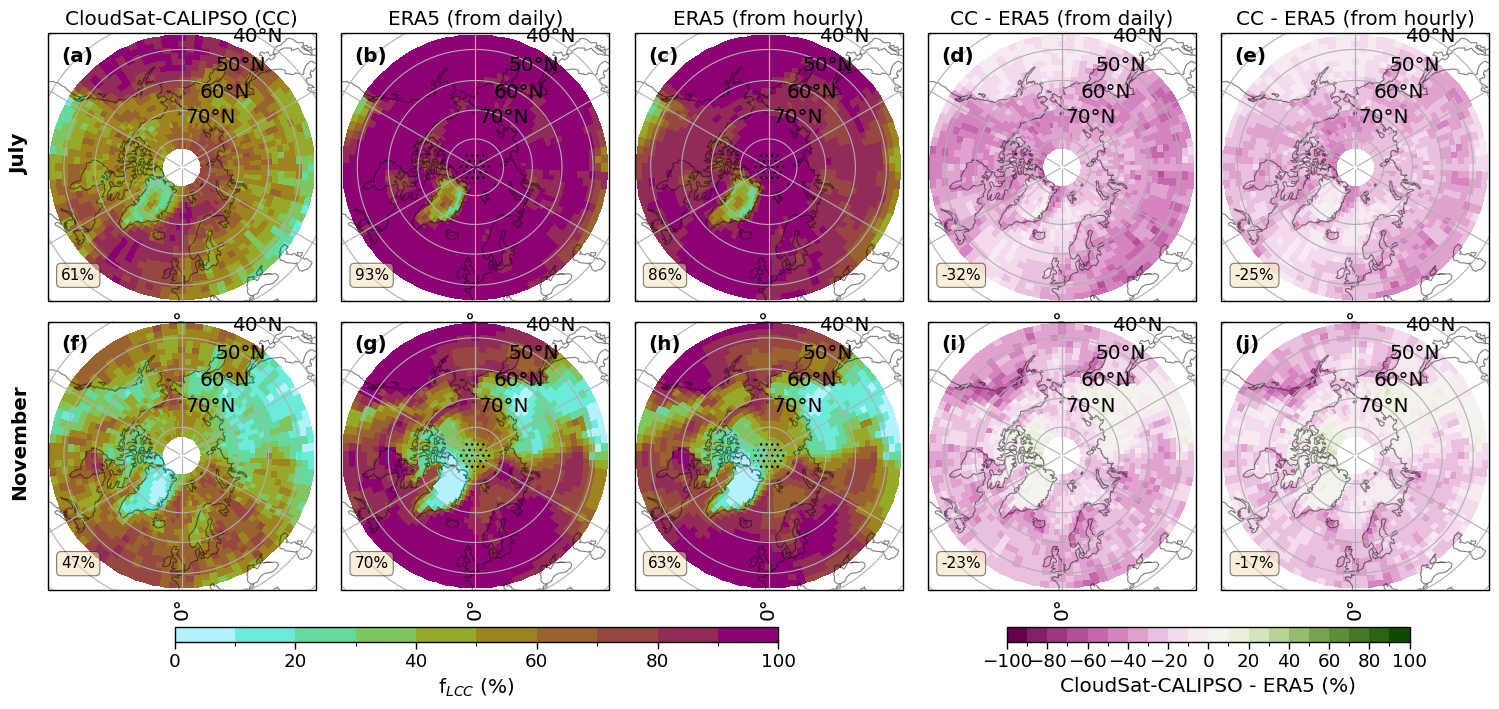

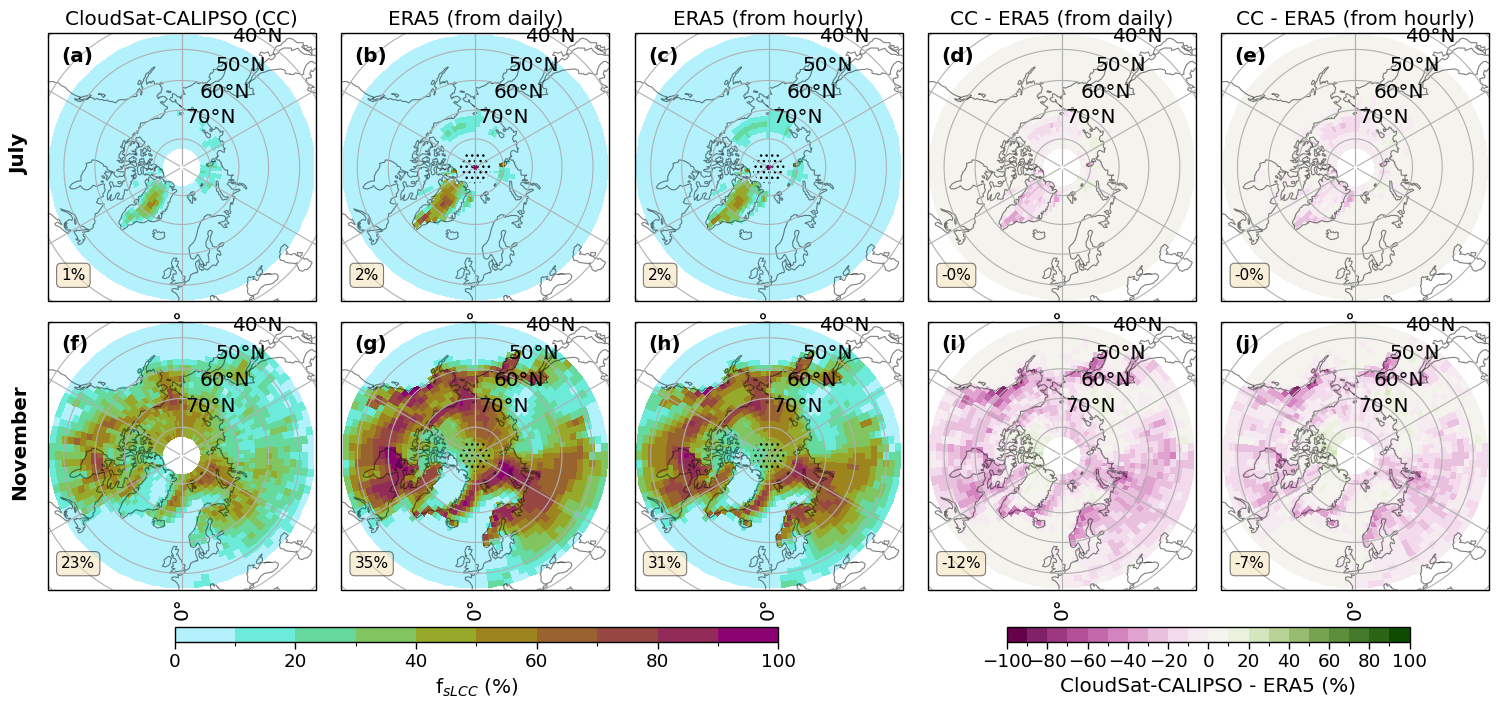

In [15]:
for var_name in ['FLCC', 'FsLCC']:
    val1 = ratios[var_name + '_month'].sel(model='CloudSat')
    val1_mean = ratios[var_name + '_month_cs_mean'].sel(model='CloudSat')
    
    val2= ratios[var_name + '_month'].sel(model='ERA5')
    val2_mean= ratios[var_name + '' + '_month_cs_mean'].sel(model='ERA5')

    val3= ratios_hourly[var_name + '_month'].sel(model='ERA5')
    val3_mean = ratios_hourly[var_name + '' +'_month_cs_mean'].sel(model='ERA5')

    diff_cs_d = val1 - val2
    diff_cs_d_mean = val1_mean - val2_mean
    
    diff_cs_h = val1 - val3
    diff_cs_h_mean = val1_mean - val3_mean
    
    diff_era = val2 - val3
    diff_era_mean = val2_mean - val3_mean

    projection = fct.create_projection(hemisphere)
    density = 4
    f, axsm = plt.subplots(nrows=2,ncols=5, 
                                    subplot_kw={'projection': projection}, 
                                    figsize=[15, 6], sharex=True, sharey=True)
    # f.suptitle(f'LWP threshold: {lwp_threshold} g m$^{-2}$', y=1.005)

    model_labels = ['July', 'November', ]

    for ax, row in zip(axsm[:,0], model_labels):
        ax.text(-0.07, 0.55, row, 
                        va='bottom', 
                        ha='center', 
                        rotation='vertical', 
                        rotation_mode='anchor', 
                        transform=ax.transAxes, 
                        fontweight='bold')
    for ax, k in zip(axsm.flatten(), range(len(fct.fig_label))):
        fct.setup_axes(ax, hemisphere, lat_extent)
        ax.text(0.05, 0.95, 
                        f'{fct.fig_label[k]}', 
                        fontweight='bold', 
                        horizontalalignment='left', 
                        verticalalignment='top', 
                        transform=ax.transAxes)
                
    list1 = [val1, val2, val3, diff_cs_d,  diff_cs_h, ]#diff_era]
    list_glob = [val1_mean, val2_mean, val3_mean, diff_cs_d_mean, diff_cs_h_mean, ]#diff_era_mean]

    # for ax in axsm.flat:


    for i, (value,hemi_glob,sub_title) in enumerate(zip(list1,list_glob, ["CloudSat-CALIPSO (CC)", 
                                                                          "ERA5 (from daily)", 
                                                                          "ERA5 (from hourly)", 
                                                                          "CC - ERA5 (from daily)", 
                                                                          "CC - ERA5 (from hourly)", ] )):
        if i == 0 or i == 1 or i == 2:
            cmap = cm.hawaii_r 
            levels = dict_label[var_name]['levels']
            norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        else:
            cmap=cm.bam
            if i == 3 or i == 4:
                levels = np.arange(-100,110,10)
                norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
                extend = None
    #         else:
    #             levels = np.arange(-15,17.5,2.5)
    #             extend = 'both'
    #         norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        val = value.sel(lat=slice(45,90)) if hemisphere == 'NH' else value.sel(lat=slice(-90,-45))
        cf = axsm.flat[i].pcolormesh(val.lon, val.lat, (val.where(~np.isnan(val))).sel(month=7), 
                                            transform=ccrs.PlateCarree(), 
                                            cmap=cmap, 
                                            norm=norm)
        val = value.sel(lat=slice(83,90)) if hemisphere == 'NH' else value.sel(lat=slice(-90,-83))
        collection = axsm.flat[i].contourf(
            val.lon, val.lat, val.sel(month=7), transform=ccrs.PlateCarree(),
            colors='none', color='white', ecolor='red', hatches=[3 * '.', 3 * '.'], add_colorbar=False
                )
        # axsm.flat[i].set_title('')
        
        # axsm.flat[i].set_title(sub_title)
        axsm.flat[i].set_title(sub_title)
        fct.add_text_box(axsm.flat[i], hemi_glob.sel(hemisphere=hemisphere, month=7), var_name)
        if i == 0:
            cbaxes = f.add_axes([0.115, -0.045, 0.4025, 0.025])
            cb_label = dict_label[var_name]['cb_label']
            plt.colorbar(cf, cax=cbaxes, shrink=0.5, extend=None, orientation="horizontal", label=cb_label)
        elif i == 3:
            cbaxes = f.add_axes([0.67, -0.045, 0.4025*2/3, 0.025])
            cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, extend=extend, orientation="horizontal", label=f"CloudSat-CALIPSO - ERA5 (%)")
            cbar.ax.get_xaxis().set_ticks(np.arange(-100,110,10)[::2])
    #     elif i == 5:
    #         cbaxes = f.add_axes([0.8525, -0.045, 0.4025*1/3, 0.025])
    #         plt.colorbar(cf, cax=cbaxes, shrink=0.5, extend=extend, orientation="horizontal", label=f"Diff. ERA5 daily - hourly")
        # hatch areas above 83N
            
        
    for i, (value,hemi_glob,) in enumerate(zip(list1,list_glob, )):
        if i == 0 or i == 1 or i == 2:
            cmap = cm.hawaii_r 
            levels = dict_label[var_name]['levels']
            norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        else:
            cmap=cm.bam
            if i == 3 or i == 4:
                levels = np.arange(-100,110,10)
                norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
                extend=None
    #         else:
    #             levels = np.arange(-15,17.5,2.5)
    #             extend='both'
    #         norm = fct.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        val = value.sel(lat=slice(45,90)) if hemisphere == 'NH' else value.sel(lat=slice(-90,-45))
        cf = axsm.flat[i+5].pcolormesh(val.lon, val.lat, (val.where(~np.isnan(val))).sel(month=11), 
                                            transform=ccrs.PlateCarree(), 
                                            cmap=cmap, 
                                            norm=norm)
        val = value.sel(lat=slice(83,90)) if hemisphere == 'NH' else value.sel(lat=slice(-90,-83))
        collection = axsm.flat[i+5].contourf(
            val.lon, val.lat, val.sel(month=11), transform=ccrs.PlateCarree(),
            colors='none', color='white', ecolor='red', hatches=[3 * '.', 3 * '.'], add_colorbar=False
                )
        # axsm.flat[i].set_title('')
        
        fct.add_text_box(axsm.flat[i+5], hemi_glob.sel(hemisphere=hemisphere, month=11), var_name)


                        
    plt.tight_layout(pad=0., w_pad=0., h_pad=0.,)
    figname = f'{var_name}_ERA5_diff_{hemisphere}_2007_2010.png'
    plt.savefig(FIG_DIR + figname, format='png', dpi=300, bbox_inches='tight', transparent=False)

In [26]:
FIG_DIR + figname

'/uio/kant/geo-geofag-u1/franzihe/Documents/Python/globalsnow/CloudSat_ERA5_CMIP6_analysis/Figures/CS_ERA5_CMIP6_hourly_5/FsLCC_ERA5_diff_NH_2007_2010.png'

In [59]:
def plt_time_series_point(lwp_daily,lwp_hourly, tas_daily, tas_hourly, lat, lon, sub_title, t2, lwp_threshold):
  colors = cm.hawaii(range(0, 256, int(256 / 4) + 1))
  # Create a 2x1 subplot figure
  f, axsm = plt.subplots(nrows=2, figsize=[24, 10], sharex=True, sharey=False)
  # f.suptitle(f'LWP threshold: {lwp_threshold} g m$^{-2}$', y=1.005)
  f.suptitle(f'{sub_title} (lat: {lat:.2f}$^o$N, lon: {lon:.2f}$^o$E)', y=1.005)


  # Loop through subplots
  for i, ax in enumerate(axsm.flat):
      ax.grid(True)
      vline_max = 1.25 if i == 0  else 320
      vline_min = 0 if i == 0 else 210
      ax.vlines([lwp_hourly.sel(x=slice((31) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((31 + 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((2 * 31 + 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((2 * 31 + 2 * 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((3 * 31 + 2 * 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((3 * 31 + 3 * 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((4 * 31 + 3 * 30) * 24)).x[-1] + 0.5,
                lwp_hourly.sel(x=slice((4 * 31 + 4 * 30) * 24)).x[-1] + 0.5], vline_min, vline_max, linestyle='--', color='gray')
      ax.set_xticks(np.arange(12, (4 * 31 + 4 * 30) * 24, 24 * 5))
      ax.set_xticks(np.arange(12, (4 * 31 + 4 * 30) * 24, 24), minor=True)
      ax.set_xlim([lwp_hourly['x'].isel(x=0), len(lwp_hourly['x'])])
      ax.set_ylabel('LWP (kg m-2)' if i == 0 else '2-m Temperature (K)')
      hline_lev = (0.001*lwp_threshold) if i == 0 else 273.15
      ax.hlines(hline_lev, lwp_hourly['x'].isel(x=0), lwp_hourly['x'].isel(x=len(lwp_hourly) - 1), color='k')
      ylim = [1*10**-5,1.2] if i == 0 else [210,320]
      ax.set_ylim(ylim)
      
      for j in range(4):  # Loop through the four years
        # Determine the indices for slicing the data
        start_idx = (j * 31 + j * 30) * 24
        mid_idx = ((j + 1) * 31 + j * 30) * 24
        end_idx = ((j + 1) * 31 + (j + 1) * 30) *24
        
        if j == 0:
            label = ['daily means July', 'hourly July', 'daily means November', 'hourly November']
        else:
            label = [None, None, None, None]
            
        if i == 0:
          # LWP data
          ax.scatter(x=lwp_daily.sel(x=slice(start_idx, mid_idx)).x,
                        y=lwp_daily.sel(x=slice(start_idx, mid_idx)).values,
                        marker='o', color=colors[0], label=label[0])
          ax.plot(lwp_hourly.sel(x=slice(start_idx, mid_idx)).x,
                      lwp_hourly.sel(x=slice(start_idx, mid_idx)).values,
                      color=colors[1], label=label[1])
          ax.scatter(x=lwp_daily.sel(x=slice(mid_idx, end_idx)).x,
                        y=lwp_daily.sel(x=slice(mid_idx, end_idx)).values,
                        marker='o', color=colors[2], label=label[2])
          ax.plot(lwp_hourly.sel(x=slice(mid_idx, end_idx)).x,
                      lwp_hourly.sel(x=slice(mid_idx, end_idx)).values,
                      color=colors[3], label=label[3])
          ax.legend(loc='upper left')
          ax.set_yscale('log')
        elif i == 1:
          # Temperature data
          ax.scatter(x=tas_daily.sel(x=slice(start_idx, mid_idx)).x,
                        y=tas_daily.sel(x=slice(start_idx, mid_idx)).values,
                        marker='o', color=colors[0], )
          ax.plot(tas_hourly.sel(x=slice(start_idx, mid_idx)).x,
                      tas_hourly.sel(x=slice(start_idx, mid_idx)).values,
                      color=colors[1], )
          ax.scatter(x=tas_daily.sel(x=slice(mid_idx, end_idx)).x,
                        y=tas_daily.sel(x=slice(mid_idx, end_idx)).values,
                        marker='o', color=colors[2], )
          ax.plot(tas_hourly.sel(x=slice(mid_idx, end_idx)).x,
                      tas_hourly.sel(x=slice(mid_idx, end_idx)).values,
                      color=colors[3], )
          ax.set_xticklabels(t2[0:len(t2):5].strftime('%Y-%m-%d'), rotation=90)


  plt.tight_layout(pad=0., w_pad=0., h_pad=0.)  ;
  figname = f'lwp_T2m_ERA5_timeseries_{lat:.1f}_{lon:.1f}_2007_2010.png'
  plt.savefig(fig_dir + figname, format='png', bbox_inches='tight', transparent=False)


In [60]:
def time_series_max_min_points(lat, lon, subtitle, ds, ds_hourly, lwp_threshold):
    lwp_nh_point = ds['orig']['era_500']['lwp'].sel(lat=lat, lon=lon, method='nearest').squeeze()
    tas_nh_point = ds['orig']['era_500']['tas'].sel(lat=lat, lon=lon, method='nearest').squeeze()
    lwp_nh_hourly = ds_hourly['orig']['era_500']['lwp'].sel(lat=lat, lon=lon, method='nearest').squeeze()
    tas_nh_hourly = ds_hourly['orig']['era_500']['tas'].sel(lat=lat, lon=lon, method='nearest').squeeze()
    # Define time ranges
    time_ranges = [
        ("2007-07", 31), ("2007-11", 30),
        ("2008-07", 31), ("2008-11", 30),
        ("2009-07", 31), ("2009-11", 30),
        ("2010-07", 31), ("2010-11", 30)
    ]

    # Initialize empty arrays
    t2 = []
    _lwp = []
    _lwp_hourly = []
    _tas = []
    _tas_hourly = []

    t2 = xr.cftime_range(start="2007-07", periods=31, freq="D").to_datetimeindex()
    t2 = t2.append(xr.cftime_range(start="2007-11", periods=30, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2008-07", periods=31, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2008-11", periods=30, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2009-07", periods=31, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2009-11", periods=30, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2010-07", periods=31, freq="D").to_datetimeindex())
    t2 = t2.append(xr.cftime_range(start="2010-11", periods=30, freq="D").to_datetimeindex())
    t2



    # Loop through time ranges and concatenate data
    for start, periods in time_ranges:
        _lwp.append(lwp_nh_point.sel(time=slice(start, start)).values)
        _lwp_hourly.append(lwp_nh_hourly.sel(time=slice(start, start)).values)
        
        _tas.append(tas_nh_point.sel(time=slice(start, start)).values)
        _tas_hourly.append(tas_nh_hourly.sel(time=slice(start, start)).values)

    # Concatenate the lists
    # t2 = np.concatenate(t2)
    _lwp = np.concatenate(_lwp)
    _lwp_hourly = np.concatenate(_lwp_hourly)
    _tas = np.concatenate(_tas)
    _tas_hourly = np.concatenate(_tas_hourly)

    # Create DataArrays
    lwp_daily = xr.DataArray(data=_lwp, coords={'x': np.arange(12, len(_lwp_hourly), 24)})
    lwp_hourly = xr.DataArray(data=_lwp_hourly, coords={'x': np.arange(len(_lwp_hourly))})

    tas_daily = xr.DataArray(data=_tas, coords={'x': np.arange(12, len(_tas_hourly), 24)})
    tas_hourly = xr.DataArray(data=_tas_hourly, coords={'x' : np.arange(len(_tas_hourly))})

    # 

    lat = lwp_nh_hourly.lat.round(2).values
    lon = lwp_nh_hourly.lon.round(2).values
    plt_time_series_point(lwp_daily,lwp_hourly, tas_daily, tas_hourly, lat, lon, subtitle, t2, lwp_threshold)

In [61]:
# _idx7_min = diff.sel(month=7).argmin(dim=("lat", 'lon'), skipna=True)
# lat7_min = diff.sel(month=7)[_idx7_min].lat.values
# lon7_min = diff.sel(month=7)[_idx7_min].lon.values
# # diff.sel(month=7)[_idx7_min].month.values
# _idx7_max = diff.sel(month=7).argmax(dim=("lat", 'lon'), skipna=True)
# lat7_max = diff.sel(month=7)[_idx7_max].lat.values
# lon7_max = diff.sel(month=7)[_idx7_max].lon.values

In [62]:
# _idx11_min = diff.sel(month=11).argmin(dim=("lat", 'lon'), skipna=True)
# lat11_min = diff.sel(month=11)[_idx11_min].lat.values
# lon11_min = diff.sel(month=11)[_idx11_min].lon.values
# _idx11_max = diff.sel(month=11).argmax(dim=("lat", 'lon'), skipna=True)
# lat11_max = diff.sel(month=11)[_idx11_max].lat.values
# lon11_max = diff.sel(month=11)[_idx11_max].lon.values

In [63]:
# lats_lons = [[lat7_min, lon7_min, 'Min difference in July mean'],
#  [lat7_max, lon7_max, 'Max difference in July mean'],
#  [lat11_min, lon11_min, 'Min difference in November mean'],
#  [lat11_max, lon11_max, 'Max difference in November mean']]

In [64]:
# for lat, lon, subtitle in lats_lons:
#     time_series_max_min_points(lat, lon, subtitle, ds, ds_hourly, lwp_threshold)
    

In [65]:
print(lwp_threshold)

5
